### Activity profile correlation: lambda vs sigma_z

In [1]:
import os
import numpy as np
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt

In [3]:
directory = "data"
data_arr = []
def load_data(filepath):
    d = np.load(open(filepath, 'rb'), allow_pickle=True)
    return d.item()
for file in tqdm(os.listdir(directory)):
    if file.endswith(".npy"):
        filepath = os.path.join(directory, file)
        data_arr.append(load_data(filepath))
data = dict()
for d in data_arr:
    key1 = d['params']['lambda']
    key2 = d['params']['sigma_z']
    data[tuple([key1, key2])] = d
keys1 = sorted(np.unique([k[0] for k in data.keys()]))
keys2 = sorted(np.unique([k[1] for k in data.keys()]))

100%|██████████| 27/27 [00:02<00:00,  9.50it/s]


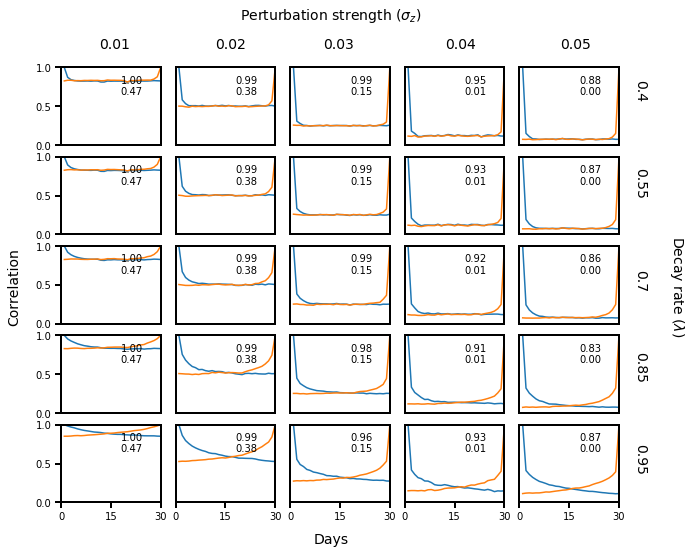

In [6]:
fig, ax = plt.subplots(5,5,figsize=(10,8))
for i in range(5):
    for j in range(5):
        try:
            k1 = keys1[i]
            k2 = keys2[j]
            d = data[(k1,k2)]
            ax[i,j].plot(
                range(1,31),
                np.nanmean(d['state']['corr'], axis=1))
            ax[i,j].plot(
                range(1,31),
                np.nanmean(d['state']['corr_rev'], axis=1))
            sim_score = d['overlap_similarity_score']
            quality_score = d['correlations'][0][-1].max()
            ax[i,j].annotate(
                "%.2f\n%.2f" % (sim_score, quality_score),
                xy=(0.6,0.65),
                xycoords='axes fraction'
            )
            ax[i,j].set_ylim([0,1])
            ax[i,j].set_xlim([0,29])
            ax[i,j].set_xticks([0,15,30])
        except:
            pass
for n in range(5):
    for m in range(1,5):
        ax[n,m].set_yticks([]);
for n in range(4):
    for m in range(5):
        ax[n,m].set_xticks([]);
        
for axis in ax.flatten():
    axis.tick_params(direction='out', length=6, width=2)
    for dr in ['top','bottom','left','right']:
        axis.spines[dr].set_linewidth(2.0)
        
        
plt.subplots_adjust(wspace=0.15, hspace=0.15)

fig.text(0.5, 0.06, 'Days', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.5, 'Correlation', ha='center', va='center', rotation='vertical', fontsize=14)

fig.text(0.5, 0.97, r'Perturbation strength ($\sigma_z$)', ha='center', va='center', fontsize=14);
fig.text(0.20, 0.92, keys2[0], ha='center', va='center', fontsize=14);
fig.text(0.36, 0.92, keys2[1], ha='center', va='center', fontsize=14);
fig.text(0.51, 0.92, keys2[2], ha='center', va='center', fontsize=14);
fig.text(0.68, 0.92, keys2[3], ha='center', va='center', fontsize=14);
fig.text(0.84, 0.92, keys2[4], ha='center', va='center', fontsize=14);

fig.text(0.98, 0.5, r'Decay rate ($\lambda$)', ha='center', va='center', rotation=-90, fontsize=14);
fig.text(0.93, 0.20, np.around(keys1[4],2), ha='center', va='center', rotation=-90, fontsize=14);
fig.text(0.93, 0.36, np.around(keys1[3],2), ha='center', va='center', rotation=-90, fontsize=14);
fig.text(0.93, 0.51, np.around(keys1[2],2), ha='center', va='center', rotation=-90, fontsize=14);
fig.text(0.93, 0.68, np.around(keys1[1],2), ha='center', va='center', rotation=-90, fontsize=14);
fig.text(0.93, 0.84, np.around(keys1[0],2), ha='center', va='center', rotation=-90, fontsize=14);

# TODO: y-axis label and lambda values on right axis
plt.savefig('../output/9.pdf', bbox_inches='tight')

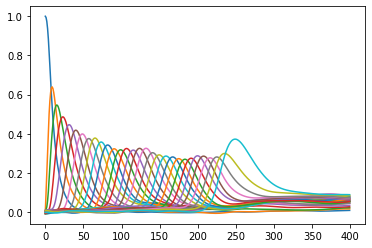

In [117]:
#for overlap in data[(k1,k2)]['correlations'][-1]:
for overlap in data[(keys1[3],keys2[1])]['correlations'][-1]:
    plt.plot(overlap);

In [104]:
data[(k1,k2)]['correlations'][0][-1].max()

0.0022645784

In [23]:
data[(k1,k2)]['params']

{'lambda': 0.4, 'sigma_z': 0.04}